https://medium.com/dair-ai/implementing-a-logistic-regression-model-from-scratch-with-pytorch-24ea062cd856

In [245]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import numpy as np
import pandas as pd
import seaborn as sns

In [246]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

SEED = 999
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

cuda:0


# 1) ETL

In [247]:
imageSize = 100
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((imageSize, imageSize)),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

In [248]:
DIR = './Plant_leave_diseases_dataset_with_augmentation/'
train_dataset = datasets.ImageFolder(DIR,transform=transform)
train_dataset

Dataset ImageFolder
    Number of datapoints: 61486
    Root location: ./Plant_leave_diseases_dataset_with_augmentation/
    StandardTransform
Transform: Compose(
               ToTensor()
               Resize(size=(100, 100), interpolation=bilinear, max_size=None, antialias=None)
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [249]:
# DIR_test = './Plant_leave_diseases_dataset_with_augmentation/'
# test_dataset = datasets.ImageFolder(DIR_test,transform=transform)

In [250]:
len(train_dataset)

61486

In [251]:
# len(test_dataset)

In [252]:
train_dataset[0]

(tensor([[[ 0.2562,  0.2584,  0.2566,  ...,  0.1303,  0.1265,  0.0933],
          [ 0.2828,  0.2497,  0.2790,  ...,  0.1293,  0.1373,  0.1514],
          [ 0.2645,  0.2627,  0.2642,  ...,  0.1287,  0.1224,  0.1214],
          ...,
          [ 0.1584,  0.1555,  0.1607,  ..., -0.2541, -0.2400, -0.2494],
          [ 0.1556,  0.1337,  0.1695,  ..., -0.2471, -0.2505, -0.2679],
          [ 0.1491,  0.1451,  0.1379,  ..., -0.2471, -0.2601, -0.2802]],
 
         [[ 0.1621,  0.1642,  0.1625,  ...,  0.0048,  0.0010, -0.0322],
          [ 0.1887,  0.1556,  0.1849,  ...,  0.0038,  0.0118,  0.0259],
          [ 0.1704,  0.1686,  0.1701,  ...,  0.0032, -0.0031, -0.0041],
          ...,
          [ 0.1035,  0.1006,  0.1058,  ..., -0.3325, -0.3184, -0.3278],
          [ 0.1007,  0.0788,  0.1146,  ..., -0.3255, -0.3289, -0.3464],
          [ 0.0942,  0.0902,  0.0830,  ..., -0.3255, -0.3385, -0.3586]],
 
         [[ 0.1935,  0.1956,  0.1939,  ...,  0.0126,  0.0089, -0.0244],
          [ 0.2201,  0.1870,

In [253]:
type(train_dataset[0])

tuple

# 2) EDA

In [254]:
classNames = list(train_dataset.class_to_idx)

In [255]:
def displayImage(img):
    img = img / 2 + 0.5
    plt.imshow(transforms.ToPILImage()(img))

torch.Size([3, 100, 100])


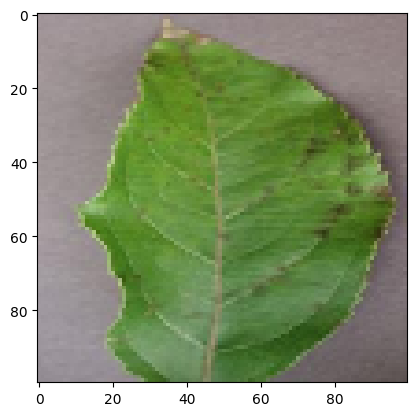

In [256]:
for temp in train_dataset:
    print(temp[0].shape)
    displayImage(temp[0])
    break

In [257]:
classNames = list(train_dataset.class_to_idx)
classNames

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Background_without_leaves',
 'Blueberry___healthy',
 'Cherry___Powdery_mildew',
 'Cherry___healthy',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust',
 'Corn___Northern_Leaf_Blight',
 'Corn___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot'

In [258]:
# counting no. of each label
labels, noOfImagesPerClass = torch.unique(torch.tensor(train_dataset.targets), return_counts=True)

In [259]:
classCount =  pd.DataFrame({'class': labels, 'count': noOfImagesPerClass})

In [260]:
classCount.head(39)

,class,count
0,0,1000
1,1,1000
2,2,1000
3,3,1645
4,4,1143
5,5,1502
6,6,1052
7,7,1000
8,8,1000
9,9,1192


In [261]:
for index, i in enumerate(range(len(noOfImagesPerClass))):
    print(f"{index} {classNames[i]}: {noOfImagesPerClass[i]}")

0 Apple___Apple_scab: 1000
1 Apple___Black_rot: 1000
2 Apple___Cedar_apple_rust: 1000
3 Apple___healthy: 1645
4 Background_without_leaves: 1143
5 Blueberry___healthy: 1502
6 Cherry___Powdery_mildew: 1052
7 Cherry___healthy: 1000
8 Corn___Cercospora_leaf_spot Gray_leaf_spot: 1000
9 Corn___Common_rust: 1192
10 Corn___Northern_Leaf_Blight: 1000
11 Corn___healthy: 1162
12 Grape___Black_rot: 1180
13 Grape___Esca_(Black_Measles): 1383
14 Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 1076
15 Grape___healthy: 1000
16 Orange___Haunglongbing_(Citrus_greening): 5507
17 Peach___Bacterial_spot: 2297
18 Peach___healthy: 1000
19 Pepper,_bell___Bacterial_spot: 1000
20 Pepper,_bell___healthy: 1478
21 Potato___Early_blight: 1000
22 Potato___Late_blight: 1000
23 Potato___healthy: 1000
24 Raspberry___healthy: 1000
25 Soybean___healthy: 5090
26 Squash___Powdery_mildew: 1835
27 Strawberry___Leaf_scorch: 1109
28 Strawberry___healthy: 1000
29 Tomato___Bacterial_spot: 2127
30 Tomato___Early_blight: 1000
31 Tomat

<AxesSubplot:xlabel='class', ylabel='count'>

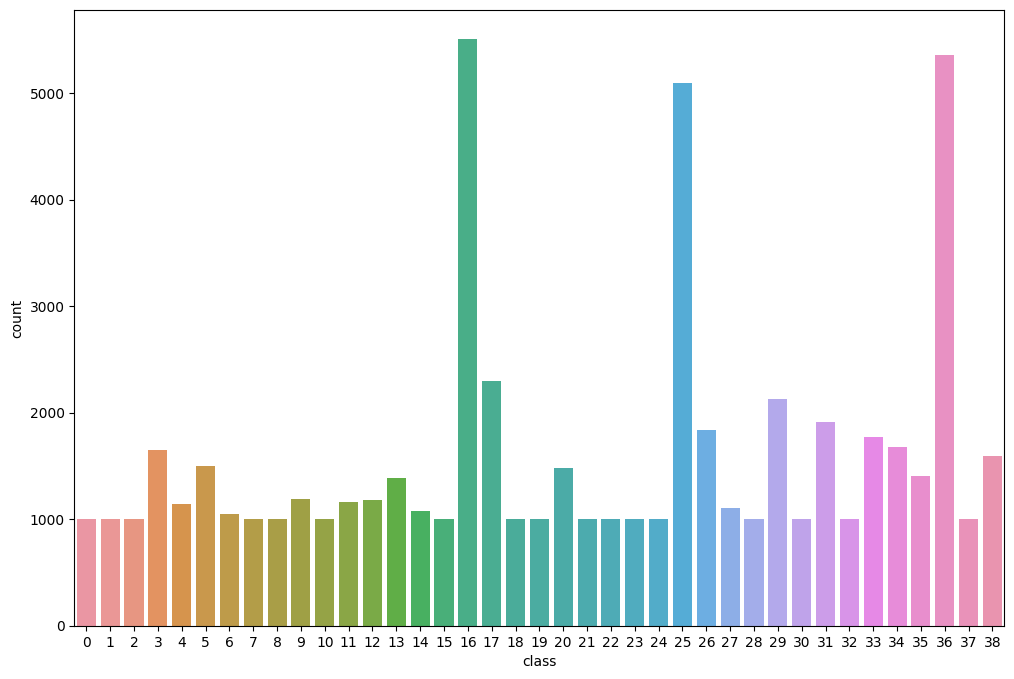

In [262]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'class', y='count', data = classCount)

In [263]:
# Mean of total samples for each label excluding 16, 25, and 36
meanCount = int(classCount.sort_values(by=['count'], ascending=False)[4:].mean()[1])
meanCount

1235

In [264]:
indices_to_keep = []
targets = torch.tensor(train_dataset.targets)
for label in labels:    
    if label == 16 or label == 25 or label == 36:
        permIndex = torch.randperm(len(targets))
        samples = (targets == label).nonzero()
        indices_to_keep.extend(samples[:meanCount])
    else:
        indices_to_keep.extend((targets == label).nonzero())

In [265]:
train_datasetBalanced = torch.utils.data.Subset(train_dataset, indices_to_keep)

In [266]:
from collections import Counter
print(Counter(train_dataset.targets[i] for i in indices_to_keep))

Counter({17: 2297, 29: 2127, 31: 1909, 26: 1835, 33: 1771, 34: 1676, 3: 1645, 38: 1591, 5: 1502, 20: 1478, 35: 1404, 13: 1383, 16: 1235, 25: 1235, 36: 1235, 9: 1192, 12: 1180, 11: 1162, 4: 1143, 27: 1109, 14: 1076, 6: 1052, 0: 1000, 1: 1000, 2: 1000, 7: 1000, 8: 1000, 10: 1000, 15: 1000, 18: 1000, 19: 1000, 21: 1000, 22: 1000, 23: 1000, 24: 1000, 28: 1000, 30: 1000, 32: 1000, 37: 1000})


In [267]:
classCount = Counter(train_dataset.targets[i] for i in indices_to_keep)
labels, count = [], []
for i in range(len(classCount)):
    labels.append(i)
    count.append(classCount[i])
classCount = pd.DataFrame({'class': labels, 'count': count})

<AxesSubplot:xlabel='class', ylabel='count'>

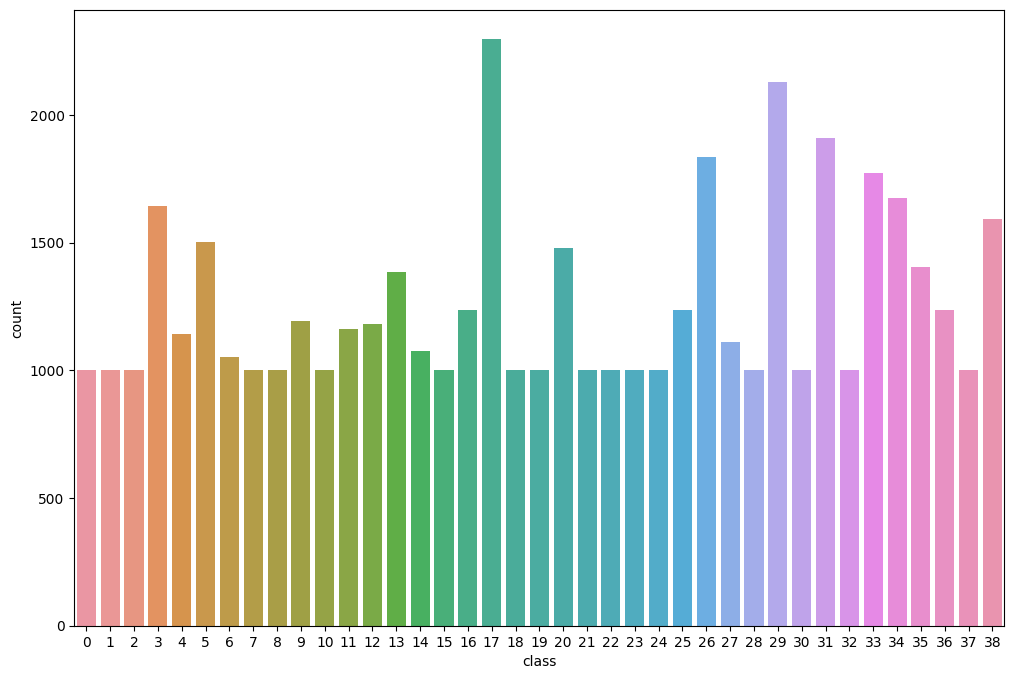

In [268]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'class', y='count', data = classCount)

In [269]:
len(train_datasetBalanced)

49237

In [270]:
train_set, test_set = torch.utils.data.random_split(train_datasetBalanced, [39237, 10000])
train_set, val_set = torch.utils.data.random_split(train_set, [30000, 9237])

In [271]:
batch_size = 100

In [272]:
n_iters = 6500

In [273]:
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
num_epochs

10

In [274]:
train_loader = DataLoader(train_set, batch_size, shuffle=True, num_workers=2, pin_memory=True)
# val_loader = DataLoader(val_set, len(val_set), shuffle=True)
# test_loader = DataLoader(test_set, len(test_set), shuffle=True)
val_loader = DataLoader(val_set, batch_size, shuffle=True, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_set, batch_size, shuffle=True, num_workers=2, pin_memory=True)

In [275]:
# train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
#                                            batch_size=batch_size, 
#                                            shuffle=True)

In [276]:
import collections
isinstance(train_loader, collections.abc.Iterable)

True

In [277]:
# test_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
#                                           batch_size=batch_size, 
#                                           shuffle=False)

In [278]:
isinstance(test_loader, collections.abc.Iterable)

True

In [279]:
img_1 = np.ones((100, 100))
img_2 = np.ones((100, 100))
lst = [img_1, img_2]

In [280]:
for i in lst:
    print(i.shape)

(100, 100)
(100, 100)


In [281]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, images):
        out = self.linear(images)
        return out



In [282]:
train_dataset[0][0].size()

torch.Size([3, 100, 100])

In [283]:
input_dim = 100*100*3
output_dim = 39

model = LogisticRegressionModel(input_dim, output_dim).to(device)


In [284]:
criterion = nn.CrossEntropyLoss()  
learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [285]:
# Type of parameter object
print(model.parameters())

# Length of parameters
print(len(list(model.parameters())))

# FC 1 Parameters 
print(list(model.parameters())[0].size())

# FC 1 Bias Parameters
print(list(model.parameters())[1].size())

<generator object Module.parameters at 0x0000022CEC0B1930>
2
torch.Size([39, 30000])
torch.Size([39])


In [286]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')

In [287]:
count_parameters(model)

1170000
    39
______
1170039


In [313]:
iter = 0
for epoch in range(num_epochs):
    val_old_loss = float("Inf")
    train_losses = []
    train_accs   = []
    avg_train_losses_per_epoch = []
    avg_train_accs_per_epoch   = []
    val_losses   = []
    val_accs     = []
    training_time = []
    training_time_per_epoch = []
    for i, (images, labels) in enumerate(train_loader):
        total_corr       = 0
        total_loss       = 0
        total_train_loss = 0
        total_time_epoch = 0
        # Load images as Variable
        images = images.view(-1, 100*100*3).requires_grad_().to(device)
        labels = labels.to(device)
        # print(images.shape)
        # print(labels.shape)
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        total_train_loss += loss

        train_losses.append(loss)
        predicted = torch.max(outputs, 1)[1]
        batch_corr = (predicted == labels).sum()
        total_corr += batch_corr

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        train_acc = (total_corr * 10) / (batch_size * (i + 1))
        train_accs.append(train_acc)
        
        iter += 1
        if (iter+1) % 250 == 0:
                correct = 0
                total = 0
                # print(f"Epoch: {epoch + 1} - Batch: {i + 1} - Train Loss: {loss:.2f} - Train Acc: {train_acc:.2f}")
                for images, labels in test_loader:
                    # Load images to a Torch Variable
                    images = images.view(-1, 100*100*3).requires_grad_().to(device)

                    # Forward pass only to get logits/output
                    outputs = model(images)

                    # Get predictions from the maximum value
                    _, predicted = torch.max(outputs.data, 1)

                    # Total number of labels
                    total += labels.size(0)

                    # Total correct predictions
                    if torch.cuda.is_available():
                        correct += (predicted.cpu() == labels.cpu()).sum()
                    else:
                        correct += (predicted == labels).sum()

                    accuracy = 100 * correct / total

                # Print Loss
                print('Epoch: {}. Iteration: {}. Loss: {}. Accuracy: {}'.format(epoch+1,iter+1, loss.item(), accuracy))

    avg_train_loss = total_train_loss / len(train_loader)   
    avg_train_acc  = (total_corr * 100) / len(train_set)
            
    avg_train_losses_per_epoch.append(avg_train_loss)
    avg_train_accs_per_epoch.append(avg_train_acc)

    # print(f"++++++End of Epoch {epoch + 1} ++++++ Avg Train Loss: {avg_train_loss:.2f} - Avg Train Acc: {avg_train_acc:.2f}")


    train_losses               = torch.Tensor(train_losses).cpu()
    avg_train_losses_per_epoch = torch.Tensor(avg_train_losses_per_epoch).cpu()
    train_accs                 = torch.Tensor(train_accs).cpu()
    avg_train_accs_per_epoch   = torch.Tensor(avg_train_accs_per_epoch).cpu()
    val_losses                 = torch.Tensor(val_losses).cpu() 
    val_accs                   = torch.Tensor(val_accs).cpu()


Epoch: 1. Iteration: 250. Loss: 1.3172693252563477. Accuracy: 59.310001373291016
Epoch: 2. Iteration: 500. Loss: 1.2904924154281616. Accuracy: 58.970001220703125
Epoch: 3. Iteration: 750. Loss: 1.1059702634811401. Accuracy: 59.380001068115234
Epoch: 4. Iteration: 1000. Loss: 1.3718109130859375. Accuracy: 59.41999816894531
Epoch: 5. Iteration: 1250. Loss: 1.497916579246521. Accuracy: 59.470001220703125
Epoch: 5. Iteration: 1500. Loss: 1.3298181295394897. Accuracy: 59.5
Epoch: 6. Iteration: 1750. Loss: 1.3828749656677246. Accuracy: 59.93000030517578
Epoch: 7. Iteration: 2000. Loss: 1.3359534740447998. Accuracy: 59.810001373291016
Epoch: 8. Iteration: 2250. Loss: 1.2590163946151733. Accuracy: 59.90999984741211
Epoch: 9. Iteration: 2500. Loss: 1.1226212978363037. Accuracy: 60.02000045776367
Epoch: 10. Iteration: 2750. Loss: 1.2472220659255981. Accuracy: 59.880001068115234
Epoch: 10. Iteration: 3000. Loss: 1.066394567489624. Accuracy: 59.959999084472656


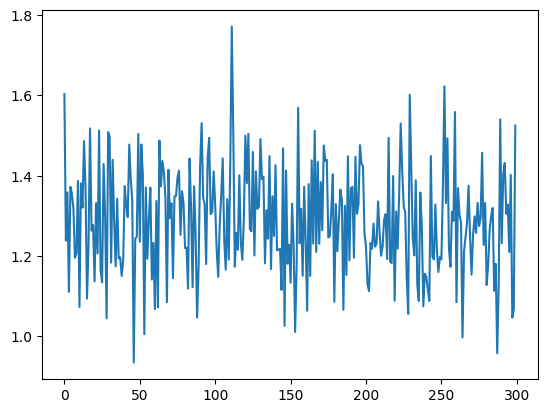

In [314]:
plt.plot(train_losses)

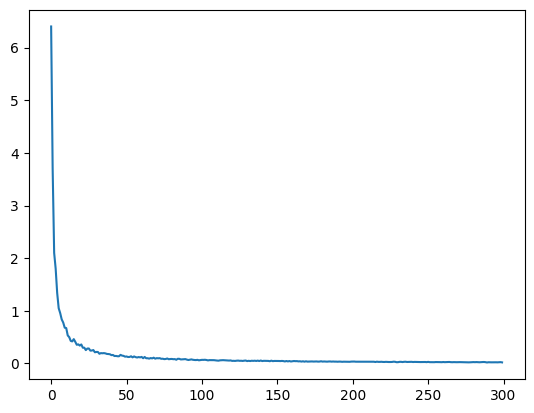

In [315]:
plt.plot(train_accs)

In [316]:

        # if iter % 500 == 0:
        #     # Calculate Accuracy         
        #     correct = 0
        #     total = 0
        #     # Iterate through test dataset
        #     for images, labels in test_loader:
        #         # Load images to a Torch Variable
        #         images = images.view(-1, 100*100*3).requires_grad_().to(device)

        #         # Forward pass only to get logits/output
        #         outputs = model(images)

        #         # Get predictions from the maximum value
        #         _, predicted = torch.max(outputs.data, 1)

        #         # Total number of labels
        #         total += labels.size(0)

        #         # Total correct predictions
        #         if torch.cuda.is_available():
        #             correct += (predicted.cpu() == labels.cpu()).sum()
        #         else:
        #             correct += (predicted == labels).sum()

        #     accuracy = 100 * correct / total

        #     # Print Loss
        #     print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))